In [1014]:
#Problem 1(a)
#Required functions - entropy, KL Divergence, Cross Entropy,Normalized Histogram,Plot joint Entropy
import numpy as np
from scipy.special import rel_entr
from PIL import Image
import matplotlib.pyplot as plt

In [1015]:
#Entropy
def entropy1(pmf):
    entropy = 0
    for value in pmf:
        if value == 0:
            continue
        entropy+=(value*np.log2(value))
    entropy = -(entropy)
#     elif isinstance(pmf,np.ndarray):
#         width,height = pmf.shape
#         for i in width:
            
    return entropy

In [1016]:
##KL Divergence
def KL_Divergence(p,q):
    
    if isinstance(p,list):
        distance = 0
        indexes = np.where(np.array(p)!=0)
        for i in indexes[0]:
            distance = distance + (p[i]*np.log2(p[i]/q[i]))
        return distance
    else:
        distance = 0
        indexes = np.where(np.array(p)!=0)
        distance = sum(p[indexes]*np.log2(p[indexes]/q[indexes]))
        return distance
            
            
        

In [1017]:
#Cross Entropy
def Cross_Entropy(p,q):
    H = entropy(p) + KL_Divergence(p,q)
    return H

In [1018]:
def normalized_hist(image,bins):
    max_intensity = 256
    min_intensity = 0
    bins = bins
    range_bin = (max_intensity-min_intensity)/bins
    intensity_array = np.zeros(bins)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            intensity = image[i][j]
            intensity_bin = int(np.round(intensity/range_bin))
            intensity_array[intensity_bin]+=1
    intensity_array = intensity_array/(image.shape[0]*image.shape[1])
    return intensity_array


## 1(a)  Cross Entropy

In [1019]:
img1 = Image.open('left.png')
img1 = np.asarray(img1)
img2 = Image.open('right.png')
img2 = np.asarray(img2)

img1_histogram = normalized_hist(img1,256)
img2_histogram = normalized_hist(img2,256)

#Cross Entropy
Cross_Entropy(img1_histogram,img2_histogram)

5.04617010961968

### Cross entropy vs varying pmf: From the plot we can see that H(p,q) is minimum when p=q i.e in this case p=q=[0.4,0.6]. Therefore we can say that minimizing H(p,q) gives us matched pmfs

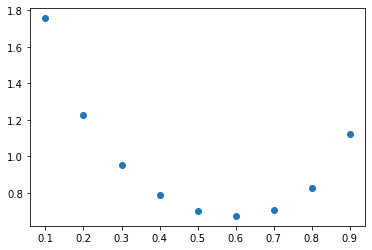

In [1020]:
p = [0.4,0.6] #fixed pmf
q = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] #varying pmf

def plot_cross_entropy(p,q):
    cross_entropy = []
    for value in q:
        q1 = [1-value,value]
        cross_entropy.append(Cross_Entropy(p,q1))
    plt.scatter(x=q,y=cross_entropy)
        
plot_cross_entropy(p,q)  

## 1(b) Jenson Shannon Divergence

In [1021]:
def JS_Divergence(p,q):
    if isinstance(p,list):
        m = []
        for i in range(len(p)):
            m.append((p[i]+q[i])/2)
        distance = KL_Divergence(p,m) + KL_Divergence(q,m)
        return distance
    
    else:
        m = (p+q)/2
        distance = KL_Divergence(p,m) + KL_Divergence(q,m)
        return distance



In [1022]:
JS_Divergence(img1_histogram,img2_histogram)

0.0073460795386296514

In [1023]:
JS_Divergence(img2_histogram,img1_histogram)

0.0073460795386296514

## 1(c) Wasserstein Distance

In [1024]:
def wasserstein_distance(joint_dis,r,s):
    rows,cols = np.array(joint_dis).shape
    row_dist = list(np.array(joint_dis).sum(axis=0))
    col_dist = list(np.array(joint_dis).sum(axis=1))
    
    if row_dist == r and col_dist == s:
        print("Positive example")
    elif row_dist ==s and col_dist ==r:
        print("Positive example")
    else:
        print("Negative example")
        
        

In [1025]:
#USING THE JOINT DISTRIBUTION EXAMPLE GIVEN IN CLASS

In [1028]:
joint_dis = [[0.125,0.0625,0.03125,0.03125],[0.0625,0.125,0.03125,0.03125],[0.0625,0.0625,0.0625,0.0625],[0.25,0,0,0]]
r = [0.5,0.25,0.125,0.125]
s = [0.25,0.25,0.25,0.25]

wasserstein_distance(joint_dis,r,s)

Positive example


In [1031]:
#CHANGING THE FIRST TWO VALUES OF FIRST ROW 
joint_dis = [[0.0625,0.125,0.03125,0.03125],[0.0625,0.125,0.03125,0.03125],[0.0625,0.0625,0.0625,0.0625],[0.25,0,0,0]]
r = [0.5,0.25,0.125,0.125]
s = [0.25,0.25,0.25,0.25]
wasserstein_distance(joint_dis,r,s)

Negative example


## 2 Visualizing data using T-SNE

## 2(A)

## 2(B)

In [1032]:
#Calculate conditional probability distributions p(j|i) and p(i|j) using mean as i and finding variance using perplexity
# p(i,j) = p(i|j)+p(j|i)/2
#Initiate mapping distribution y = 20 random points from multivariate gaussian of 2D with mean = 0 , variance = 10**-4 I
#For number of iterations do
#compute q(i,j) 
#compute gradient dc/dyi
#compute y(t) = y(t-1) + learning_rate*gradient + momentum*()

In [1033]:
I = np.identity(10)
mean1 = np.ones(10)
mean2 = 10*np.ones(10)

cluster1 = np.random.multivariate_normal(mean1,0.01*I,size=10)
cluster2 = np.random.multivariate_normal(mean2,0.01*I,size=10)

cluster = np.concatenate([cluster1,cluster2],axis=0)

In [1034]:

def neighbours_distance_pij(data,index,variance):
    data_point1 = data[index]
    indexes = np.where(np.arange(0,data.shape[0])!=index)
    neighbour_distances = []
    for i in indexes[0]:
        distance=np.exp((-1)*(np.linalg.norm(data_point1-data[i])**2/(2*(variance**2))))
        neighbour_distances.append([i,distance])
    return neighbour_distances
        
def prob_dist_pij(data,index1,index2,variance):
    data_point1 = data[index1]
    data_point2 = data[index2]
    distance=np.exp(-1*(np.linalg.norm(data_point1-data_point2)**2/(2*(variance**2))))
    neighbour_distances = neighbours_distance_pij(data,index1,variance)
    sum_distance = 0
    for i in neighbour_distances:
        sum_distance+=i[1]
    if sum_distance!=0:
        return distance/sum_distance
    else:
        return 0

def neighbours_distance_qij(data,index):
    data_point1 = data[index]
    indexes = np.where(np.arange(0,data.shape[0])!=index)
    neighbour_distances = []
    for i in indexes[0]:
        distance=(1+np.linalg.norm(data_point1 -data[i])**2)**(-1)
        neighbour_distances.append([i,distance])
    return neighbour_distances

def prob_dist_qij(data,index1,index2):
    data_point1 = data[index1]
    data_point2 = data[index2]
    distance = (1+np.linalg.norm(data_point1 - data_point2)**2)**(-1)
    neighbour_distances = neighbours_distance_qij(data,index1)
    sum_distance = 0
    for i in neighbour_distances:
        sum_distance+=i[1]
    if sum_distance!=0:
        return distance/sum_distance
    else:
         return 0

        
    
    

In [1035]:
#p(j|i) = e(-(|xi-xj|**2/2sigma-i**2))/sum(e(|xi - xk|**2/2sigma-i**2))
#input - data-points,list of variances
def find_pij(data,variance):
    n = data.shape[0]
    pij = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i!=j:
                prob_dist1 = prob_dist_pij(data,i,j,variance)
                prob_dist2 = prob_dist_pij(data,j,i,variance)
                pij[i,j] = (prob_dist1 + prob_dist2)/(2*n)
                
    return pij
    
def find_qij(data):
    n = data.shape[0]
    qij = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i!=j:
                qij[i,j] = prob_dist_qij(data,i,j)
    return qij

In [1036]:
def compute_tsne(data,variance,iterations,learning_rate,momentum):
    pij = find_pij(data,variance)
    y = np.random.multivariate_normal(np.zeros(2),0.0001*np.identity(2),size = data.shape[0])    
    qij = find_qij(y)    
    fig,(ax1,ax2) = plt.subplots(1,2)
    color=['blue']*10+['red']*10
    ax1.scatter(y[:,0],y[:,1],color=color)
    ax1.set_title("Before iterations")
    print("KL_Divergence at the beginning: ",KL_Divergence(pij,qij))
    
    previous_values=np.zeros((pij.shape[0],2,y.shape[1]))
    for iter in range(iterations):
        for i in range(y.shape[0]):
            sum_value=0
            for j in range(y.shape[0]):
                sum_value+=(pij[i,j]-qij[i,j])*((y[i]-y[j])*((1+np.linalg.norm(y[i]-y[j])**2)**-1))
            y[i]+=4*learning_rate*sum_value+momentum*(previous_values[i,1]-previous_values[i,0])
            previous_values[i,0]=previous_values[i,1]
            previous_values[i,1]=y[i]
    qij = find_qij(y)
    ax2.scatter(y[:,0],y[:,1],color=color)
    ax2.set_title("After Iterations")
    
    print("\nKL Divergence after iterations: ",KL_Divergence(pij,qij))

    
    
    
    


In this plot we can compare the learning_rate by increasing it by a factor of 10

It seems that there is an optimal value of learning rate where the data is clearly separated linearly.


TSNE PLOT FOR Learning rate:0.01 and momentum:1
KL_Divergence at the beginning:  -0.5277468962892228

KL Divergence after iterations:  -0.5296302501152191
TSNE PLOT FOR Learning rate:0.1 and momentum:1
KL_Divergence at the beginning:  -0.5278464903947558

KL Divergence after iterations:  -1.1036642610360958
TSNE PLOT FOR Learning rate:1 and momentum:1
KL_Divergence at the beginning:  -0.5278758094631695

KL Divergence after iterations:  1.4058379682781896
TSNE PLOT FOR Learning rate:10 and momentum:1
KL_Divergence at the beginning:  -0.5276776666503951

KL Divergence after iterations:  0.27350425498242925


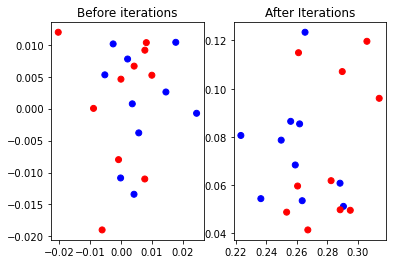

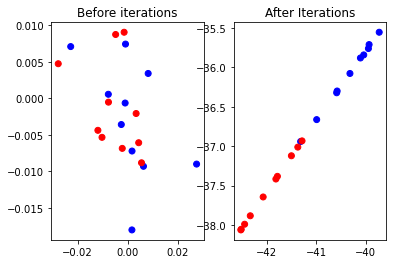

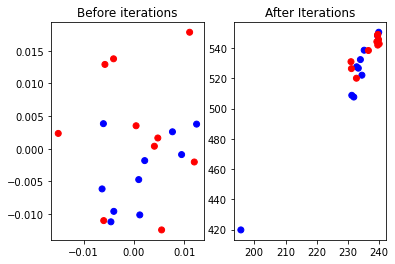

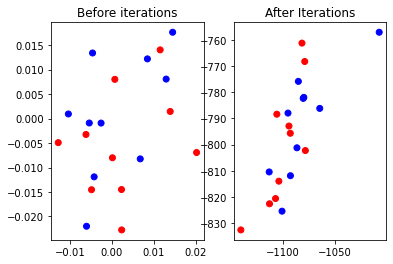

In [1038]:
#Learning_rate = 0.01,0.1,1,10, momentum = 1
print("TSNE PLOT FOR Learning rate:{0} and momentum:{1}".format(0.01,1))
compute_tsne(cluster,0.01,50,0.01,1)
print("TSNE PLOT FOR Learning rate:{0} and momentum:{1}".format(0.1,1))
compute_tsne(cluster,0.01,50,0.1,1)
print("TSNE PLOT FOR Learning rate:{0} and momentum:{1}".format(1,1))
compute_tsne(cluster,0.01,50,1,1)
print("TSNE PLOT FOR Learning rate:{0} and momentum:{1}".format(10,1))
compute_tsne(cluster,0.01,50,10,1)

By increasing the momentum and keeping learning rate constant we see that the space between points keeps increasing.

TSNE PLOT FOR Learning rate:0.1 and momentum:0.01
KL_Divergence at the beginning:  -0.5277573839547275

KL Divergence after iterations:  -0.5278117938741858
TSNE PLOT FOR Learning rate:0.1 and momentum:0.1
KL_Divergence at the beginning:  -0.5278572572529795

KL Divergence after iterations:  -0.5278117938741858
TSNE PLOT FOR Learning rate:0.1 and momentum:1
KL_Divergence at the beginning:  -0.5275916710005325

KL Divergence after iterations:  -1.030603318472077
TSNE PLOT FOR Learning rate:0.1 and momentum:10
KL_Divergence at the beginning:  -0.5278709367294554

KL Divergence after iterations:  0.41146046669132125


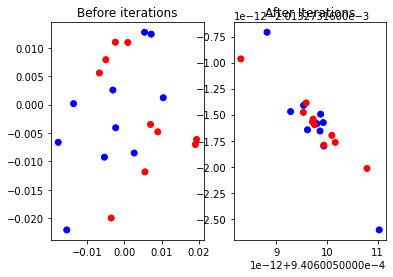

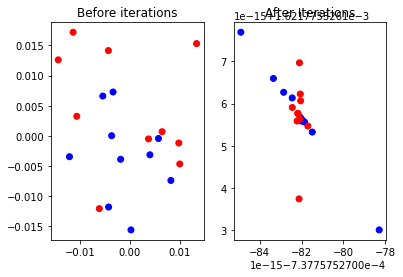

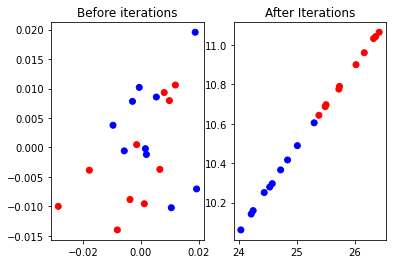

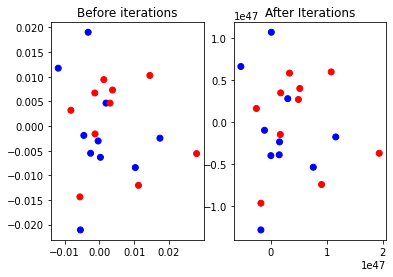

In [1039]:
#Learning_rate = 0.1, momentum = 0.01,0.1,1,10
print("TSNE PLOT FOR Learning rate:{0} and momentum:{1}".format(0.1,0.01))
compute_tsne(cluster,0.01,50,0.1,0.01)
print("TSNE PLOT FOR Learning rate:{0} and momentum:{1}".format(0.1,0.1))
compute_tsne(cluster,0.01,50,0.1,0.1)
print("TSNE PLOT FOR Learning rate:{0} and momentum:{1}".format(0.1,1))
compute_tsne(cluster,0.01,50,0.1,1)
print("TSNE PLOT FOR Learning rate:{0} and momentum:{1}".format(0.1,10))
compute_tsne(cluster,0.01,50,0.1,10)

### TSNE using sklearn

By increasing the perplexity we can see that the clusters get less denser.

C:\Users\aksha\miniconda3\envs\tfgpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


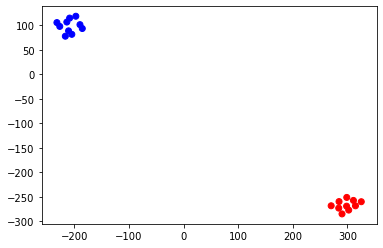

In [767]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2,init='random',perplexity=5)
output = tsne.fit_transform(cluster)
color=['blue']*10+['red']*10
plt.scatter(output[:,0],output[:,1],color=color)

C:\Users\aksha\miniconda3\envs\tfgpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


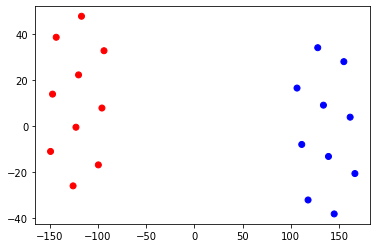

In [770]:
tsne = TSNE(n_components = 2,init='random',perplexity=10)
output = tsne.fit_transform(cluster)
color=['blue']*10+['red']*10
plt.scatter(output[:,0],output[:,1],color=color)

C:\Users\aksha\miniconda3\envs\tfgpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


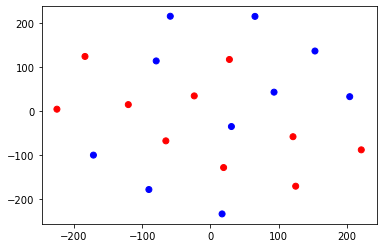

In [771]:
tsne = TSNE(n_components = 2,init='random',perplexity=20)
output = tsne.fit_transform(cluster)
color=['blue']*10+['red']*10
plt.scatter(output[:,0],output[:,1],color=color)

## 3 (A) Convolution

In [951]:
#Reflect image
image = Image.open('4.1.05.tiff')
image = np.asarray(image)
# image.shape# 

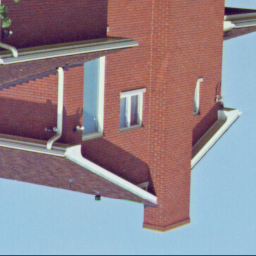

In [847]:
Image.fromarray(np.uint8(image1)).convert('RGB')

In [907]:
#flip the image
def flip_image(image):
    image_copy = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_copy[i][j] = image[image.shape[0]-i-1,image.shape[1]-j-1]
    return image_copy

In [939]:
#Pad the images along edges 
def reflect_image(image,kernel):
    r = kernel.shape[0] - 1
    s = kernel.shape[1] - 1
#     c = image.shape[2] - 1 
    reflect_array = np.zeros((image.shape[0]+2*r,image.shape[1]+2*s,image.shape[2]))
    reflect_array[r:image.shape[0]+r,s:image.shape[1]+s] = image
    #first two columns
    reflect_array[r:image.shape[0]+r,0:s] = np.flip(image[:,0:s],axis=1)
    #last two columns
    reflect_array[r:image.shape[0]+r,-s:] = np.flip(image[:,-s:],axis=1)
    #first two rows 
    reflect_array[0:r,s:image.shape[1]+s] = np.flip(image[0:r,:],axis=0)
    #last two rows
    reflect_array[-r:,s:image.shape[1]+s] = np.flip(image[-r:,:],axis=0)
    #filling top left filter
    reflect_array[0:r,0:s] = flip_image(reflect_array[0:r,s:s+s])
    #filling top right filter
    reflect_array[0:r,-s:] = flip_image(reflect_array[0:r,-(s+s):-s])
    #filling bottom left filter
    reflect_array[-r:,0:s] = flip_image(reflect_array[-r:,s:s+s])
    #filling bottom right filter
    reflect_array[-r,-s:] = flip_image(reflect_array[-r,-(s+s):-s])
    
    return reflect_array
    

In [994]:
#Generate random kernel
kernel = np.random.rand(3,3,3)

In [1006]:
def conv(image,kernel):
    kernel = flip_image(kernel)
    reflected_image = reflect_image(image,kernel)
#     reflected_image = flip_image(reflected_image)
    image_h = reflected_image.shape[0]
    image_w = reflected_image.shape[1]
    image_c = reflected_image.shape[2]
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    kernel_c = kernel.shape[2]
    
    r = kernel.shape[0]-1
    s = kernel.shape[1]-1 
    
    h = kernel_h//2
    w = kernel_w//2
    
    conv_image = np.zeros(reflected_image.shape)
    
    for i in range(image_c):
        for j in range(h,image_h-h):
            for k in range(w,image_w-w):
                sum_value = 0
                for m in range(kernel_h):
                    for n in range(kernel_h):
                        sum_value = sum_value + kernel[m,n,i]*reflected_image[j-h+m,k-w+n,i]
                conv_image[j,k,i] = sum_value
    return conv_image[r:image_h - r,s:image_w -s]

In [1007]:
conv_im = conv(image,kernel)

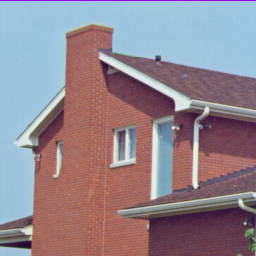

In [1008]:
#Original Image
Image.fromarray(np.uint8(image)).convert('RGB')

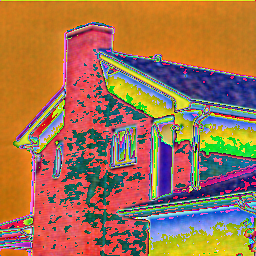

In [1009]:
#Convoluted image
Image.fromarray(np.uint8(conv_im)).convert('RGB')

## 3(B) Correlation

In [999]:
def corr(image,kernel):
    reflected_image = reflect_image(image,kernel)
    image_h = reflected_image.shape[0]
    image_w = reflected_image.shape[1]
    image_c = reflected_image.shape[2]
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    kernel_c = kernel.shape[2]
    
    r = kernel.shape[0]-1
    s = kernel.shape[1]-1 
    
    h = kernel_h//2
    w = kernel_w//2
    
    corr_image = np.zeros(reflected_image.shape)
    
    for i in range(image_c):
        for j in range(h,image_h-h):
            for k in range(w,image_w-w):
                sum_value = 0
                for m in range(kernel_h):
                    for n in range(kernel_w):
                        sum_value = sum_value + kernel[m,n,i]*reflected_image[j-h+m,k-w+n,i]
                corr_image[j,k,i] = sum_value
    return corr_image[r:image_h - r,s:image_w -s]

In [1000]:
corr = corr(image,kernel)

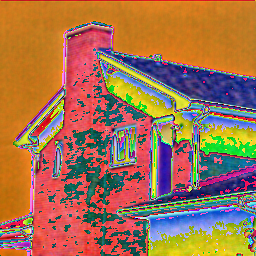

In [1040]:
#Correlated Image
Image.fromarray(np.uint8(corr)).convert('RGB')

In [1013]:
np.linalg.norm(conv_im-corr)

7276.253586092226